In [1]:
#### LOAD PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Outputs/model_13_03_21.csv")

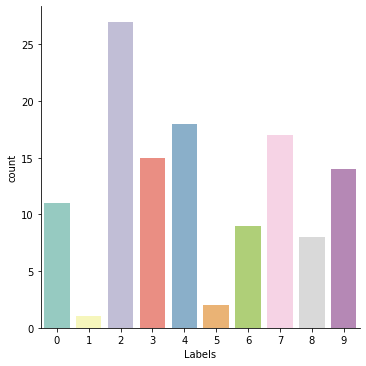

In [3]:
#### Cluster distribution
import seaborn as sns
#sns.set(style="whitegrid")
sns.catplot(x="Labels", kind="count", data=df, palette="Set3")

<AxesSubplot:ylabel='Labels'>

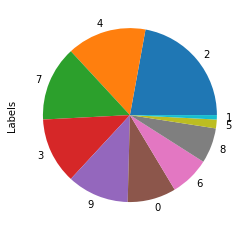

In [4]:
df['Labels'].value_counts().plot(kind='pie')

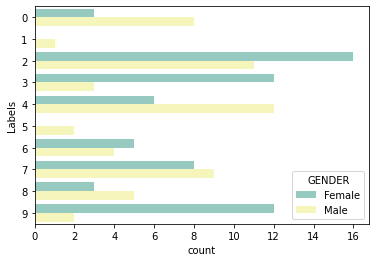

In [5]:
###  Clusters by gender
ax = sns.countplot(y="Labels", hue="GENDER", data=df, palette="Set3") ## cluster 0,4,6,9 are mainly from women

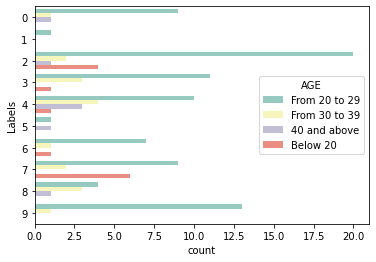

In [6]:
###  Clusters by age
ax = sns.countplot(y="Labels", hue="AGE", data=df, palette="Set3") ##  Cluster 2 is mainly young, cluster 4 is mainly old

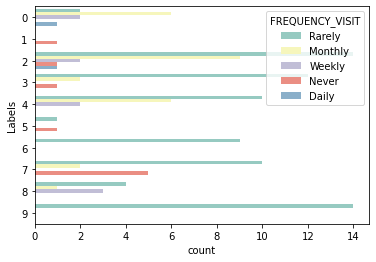

In [7]:
###  Clusters by frequency 
ax = sns.countplot(y="Labels", hue="FREQUENCY_VISIT", data=df, palette="Set3") ##  Cluster 2 is the less engaged client, cluster  0. is the most engaged one.

In [8]:
#### CLUSTERS GENERALIZATION - 
pd_dfs = []
for Label in df['Labels'].unique():
    pd_dfs.append(df[df['Labels']== Label].mode())
df_gen =  pd.concat(pd_dfs).dropna()


In [9]:
df_gen

,GENDER,AGE,EMPLOYMENT,INCOME,FREQUENCY_VISIT,HOW_DO_YOU_ENJOY_STARBUCKS,TIME_PER_VISIT,DISTANCE_TO_NEAREST_STORE,MEMBER,SPEND_PER_VISIT,...,FG_juices,FG_never,FG_pastries,FG_sandwiches,FG_DIGITAL_MEDIA,FG_STARBUCKS_WEBSITE,FG_EMAIL,FG_FRIENDS,FG_FISIC,Labels
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Less than RM20,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0
0,Male,From 20 to 29,Employed,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,more than 3km,No,Around RM20 - RM40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,1km - 3km,No,Less than RM20,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
0,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,more than 3km,No,Around RM20 - RM40,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
0,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,Yes,Less than RM20,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0
0,Male,From 20 to 29,Employed,"RM50,000 - RM100,000",Monthly,Drive-thru,Below 30 minutes,more than 3km,Yes,Around RM20 - RM40,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Less than RM20,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0
0,Male,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Between 30 minutes to 1 hour,1km - 3km,Yes,Less than RM20,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0
0,Male,40 and above,Employed,"Less than RM25,000",Never,Dine in,Below 30 minutes,more than 3km,No,Less than RM20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
0,Male,From 20 to 29,Student,"More than RM150,000",Never,Never,Below 30 minutes,more than 3km,No,Zero,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [10]:
df_gen.to_csv("../Outputs/Clusters_Mode.csv")

In [7]:
#### Activation recommendations
##cluster 0: is mainly, employed, from 20-29, male, engaged with the brand, stays little time in the stores and uses a lot drive thru he also is the digital client , a good one to be activated
##cluster 1 is mainly, employed, from 20-29, female, less engaged with the brand, leaves near of the store since she lives near the store and more prone to ber influenced fisically, the activation for her should be more by billboards close to the stores
## Cluser 2 is the youngster, we is really influenced digitally, and has a potential do engage with the brand.
## Cluster3 :should be activated as cluster 2, except the fact that its a girl
## Cluster 4: this cluster is more engaged with the brand, he go to the store to keep in touch with his friends, and also should be targeted digitally
## Cluster 5 is mainly a female, she likes to spend some time inside the stores, so her habits are more related to the experience inside the store, she also spends more then the others and is digitally influenced 
## Cluster 6 is a student, he doesnt spend much, but likes to eat inside the store, we is really engaged with the brand , in a sense that he is member, uses starbucks website and visit a lot the stores with his friends
## Cluster 7 is emplyed, she has a higher income, lives near the store, howver she doesnt spend much, and doesnt like to spen much time into the store
## Cluster 8 is emplyed, she is less engaged with the brand, she doesnt spend much, and uses more take away
## Cluster 9 is a student, he is less engaged with the brand (rarely goes),however he spends more time in the store, is a member and is digitally influenced.

In [8]:
df_gen.columns

Index(['GENDER', 'AGE', 'EMPLOYMENT', 'INCOME', 'FREQUENCY_VISIT',
       'HOW_DO_YOU_ENJOY_STARBUCKS', 'TIME_PER_VISIT',
       'DISTANCE_TO_NEAREST_STORE', 'MEMBER', 'SPEND_PER_VISIT', 'QUALITY_EV',
       'PRICE_EV', 'PROMOTIONS_EV', 'AMBIANCE_EV', 'WIFI_EV', 'SERVICE_EV',
       'BUSINESS_OR_FRIENDS', 'POTENTIAL_CLIENT', 'FG_cake', 'FG_coffee',
       'FG_colddrinks', 'FG_jawschip', 'FG_juices', 'FG_never', 'FG_pastries',
       'FG_sandwiches', 'FG_DIGITAL_MEDIA', 'FG_STARBUCKS_WEBSITE', 'FG_EMAIL',
       'FG_FRIENDS', 'FG_FISIC', 'Labels'],
      dtype='object')

In [9]:
def table_Cat(col1,col2):
    NM = df[[col1,col2]]
    table = pd.pivot_table(NM, index = [col1],
                          columns = [col2], aggfunc = len, fill_value = 0)
    table_sort = table.sort_values([0,1], ascending = False)
    return table_sort

In [31]:
def df_col_table_Cat(cols):
    df_list = []
    a = df[cols]
    for col in a.columns:
        out = table_Cat(col,'Labels')
        out.reset_index(inplace = True)
        
        ##print(col)
        df_list.append(out)
    return df_list

In [32]:
dfcols = ['GENDER', 'AGE', 'EMPLOYMENT', 'INCOME', 'FREQUENCY_VISIT',
       'HOW_DO_YOU_ENJOY_STARBUCKS', 'TIME_PER_VISIT',
       'DISTANCE_TO_NEAREST_STORE', 'MEMBER', 'SPEND_PER_VISIT', 'QUALITY_EV',
       'PRICE_EV', 'PROMOTIONS_EV', 'AMBIANCE_EV', 'WIFI_EV', 'SERVICE_EV',
       'BUSINESS_OR_FRIENDS', 'POTENTIAL_CLIENT', 'FG_cake', 'FG_coffee',
       'FG_colddrinks', 'FG_jawschip', 'FG_juices', 'FG_never', 'FG_pastries',
       'FG_sandwiches', 'FG_DIGITAL_MEDIA', 'FG_STARBUCKS_WEBSITE', 'FG_EMAIL',
       'FG_FRIENDS', 'FG_FISIC']

In [41]:
df_l = df_col_table_Cat(dfcols)